In [1]:
import os
import sys
project_path = os.path.abspath('../')
sys.path.append(project_path)
from bikeability import bikeability
from bikeability import settings
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path

This an example on how to calculate the bikeability index based on Hardinghaus et. al. 2020

First, we are loading all the necessary packages. If this does not work, pleas look at the installation instructions

In [2]:
aggregation_boundaries = gpd.read_file(project_path+f"\\data\\cargo_test.gpkg").to_crs(epsg='4326')

we can have a look how this looks like

<Axes: >

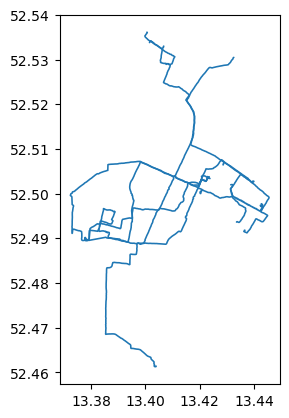

In [3]:
aggregation_boundaries.plot()

ok. let’s define some configuration parameters. We need an id column in the aggregation dataset. If this is not present, create one in your favorite GIS software. the parameter download illustrates if data should be downloaded directly from osm or not. be careful: if you are calculating the index for the first time for new aggregation geometries you have to download all the data first.

In [4]:
home_directory = Path.home()
settings.tmp_directory = f"{home_directory}/.bikeability"
id_column = "track_id"
download = True
verbose = 1
agg_table = aggregation_boundaries[[id_column, "person_id", "geometry"]]

In [5]:
bikeability_gdf = bikeability.calc_bikeability(id_column, agg_table, download=download, verbose=verbose)

Generating bikeability indicator

downloading street network and additional data from osm

downloading green spaces from osm

downloading bike shops from osm

all necessary data has been downloaded

calculating share of cycling infrastructure

calculating share of small streets

calculating green share

calculating node density



C:\Users\niel_sm\AppData\Local\anaconda3\envs\bikeability\Lib\site-packages\joblib\_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
C:\Users\niel_sm\AppData\Local\anaconda3\envs\bikeability\Lib\site-packages\joblib\_utils.py:39: DeprecationWarning: Attribute n is deprecated and will be removed in Python 3.14; use value instead
  return node.n


calculating shop density calculated

bikeability values have been calculated for 9 geometries



In [ ]:
bikeability_gdf.plot(column= "bikeability", legend=True)

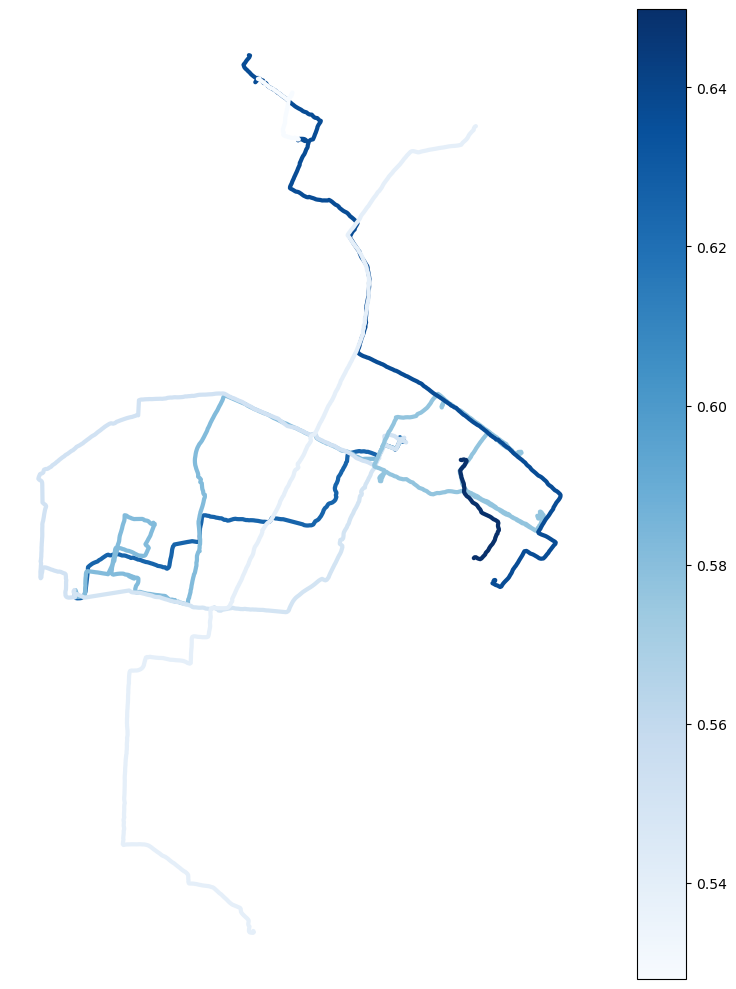

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
bikeability_gdf.plot(column= 'bikeability', ax=ax, cmap='Blues', legend=True)
ax.axis('off')
plt.tight_layout()
plt.show()

In [8]:
network = gpd.read_file(f"{settings.tmp_directory}/network.gpkg")


<Axes: >

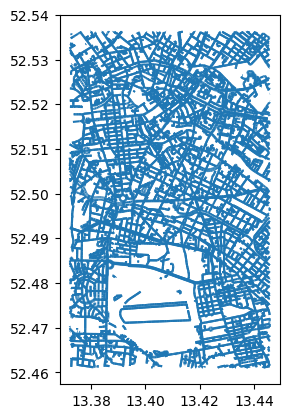

In [10]:
network.plot()

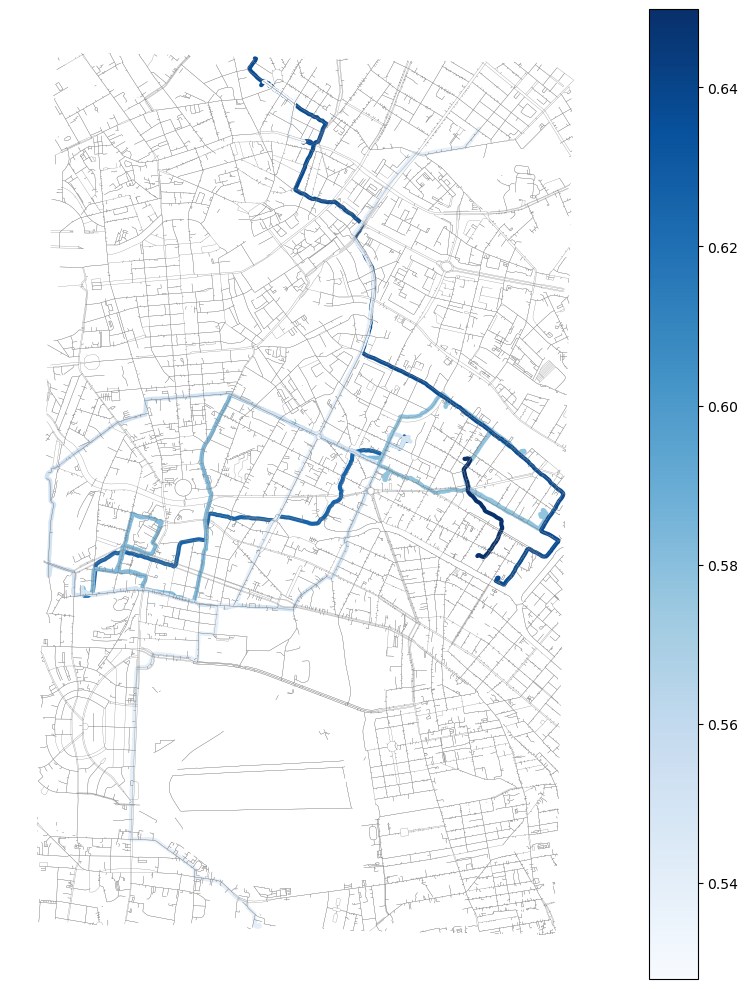

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
network.to_crs(bikeability_gdf.crs).plot(color="grey", linewidth=0.2, ax=ax)
bikeability_gdf.plot(column= 'bikeability', ax=ax, cmap='Blues', legend=True)
ax.axis('off')
plt.tight_layout()
plt.show()

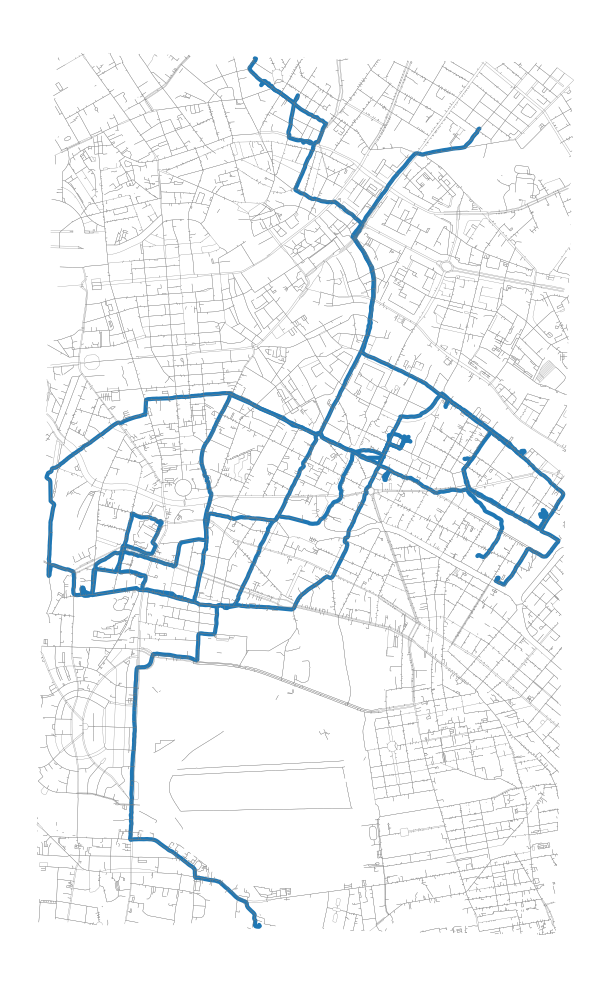

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
network.to_crs(bikeability_gdf.crs).plot(color="grey", linewidth=0.2, ax=ax)
aggregation_boundaries.to_crs(bikeability_gdf.crs).plot(ax=ax)
ax.axis('off')
plt.tight_layout()
plt.show()

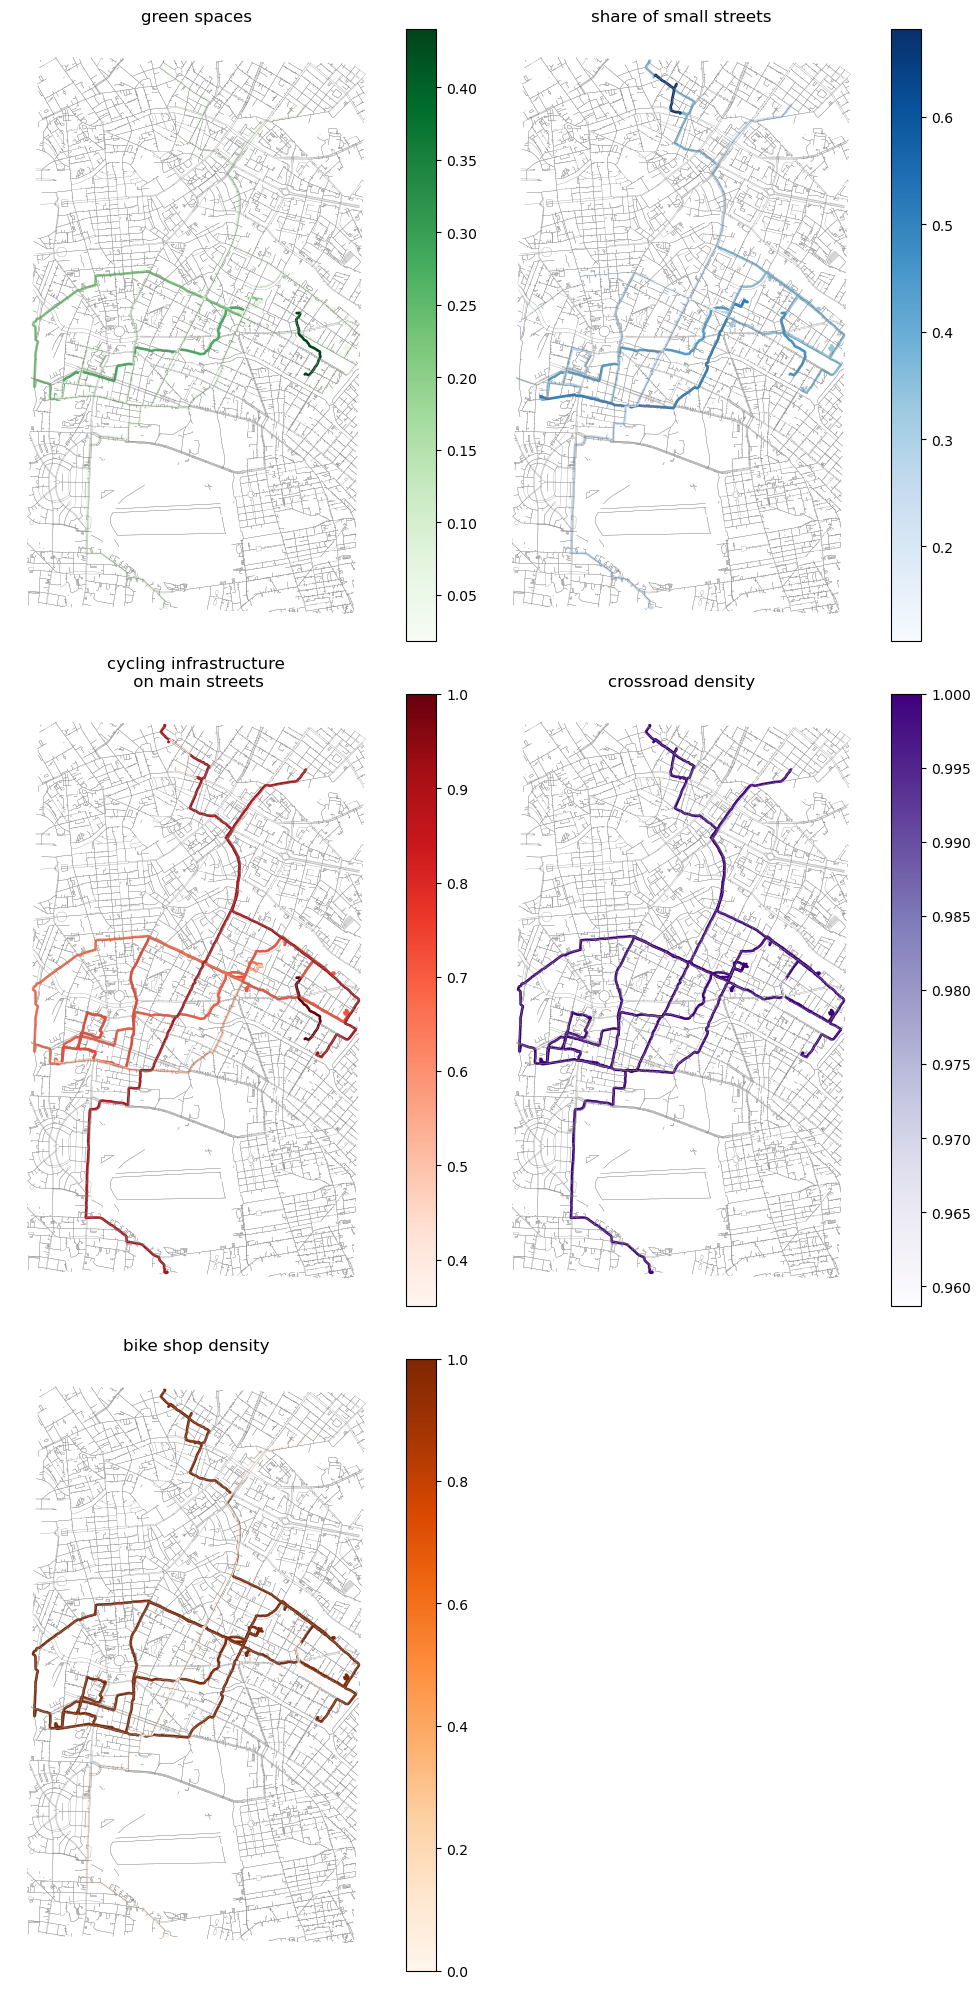

In [23]:
fig, axs = plt.subplots(3, 2, figsize=(10,20))
network.to_crs(bikeability_gdf.crs).plot(ax=axs[0,0], color="grey", linewidth=0.2)
network.to_crs(bikeability_gdf.crs).plot(ax=axs[0,1], color="grey", linewidth=0.2)
network.to_crs(bikeability_gdf.crs).plot(ax=axs[1,0], color="grey", linewidth=0.2)
network.to_crs(bikeability_gdf.crs).plot(ax=axs[1,1], color="grey", linewidth=0.2)
network.to_crs(bikeability_gdf.crs).plot(ax=axs[2,0], color="grey", linewidth=0.2)
bikeability_gdf.plot(ax=axs[0,0],  column= "green_spaces_share", cmap="Greens", legend=True)
bikeability_gdf.plot(ax=axs[0,1],  column= "small_streets_share", cmap="Blues", legend=True)
bikeability_gdf.plot(ax=axs[1,0],  column= "cycling_infra_share", cmap="Reds", legend=True)
bikeability_gdf.plot(ax=axs[1,1],  column= "node_dens_scaled", cmap="Purples", legend=True)
bikeability_gdf.plot(ax=axs[2,0],  column= "shop_dens_scaled", cmap="Oranges", legend=True)

axs[0,0].axis('off')
axs[0,0].title.set_text("green spaces")
axs[0,1].axis('off')
axs[0,1].title.set_text("share of small streets")
axs[1,0].axis('off')
axs[1,0].title.set_text("cycling infrastructure\n on main streets")
axs[1,1].axis('off')
axs[1,1].title.set_text("crossroad density")
axs[2,0].axis('off')
axs[2,0].title.set_text("bike shop density")
axs[2,1].axis('off')
plt.tight_layout()
